## Shipping Label Data Generation
    - Create sythentic Dataset of boxes on a conveyor belt.
    
#### Import Required Libraries

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import re
import matplotlib.pylab as plt
import cv2

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=6144)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


#### Yelp Dataset - JSON to Pandas Data Frame

In [ ]:
import time
t_start = time.time()

business_json_path = 'yelp_academic_dataset_business.json'
df_yelp = pd.read_json(business_json_path, lines=True,orient='columns')

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Time elapsed: 2.230 seconds


In [ ]:
df_yelp=df_yelp.drop(['latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'], axis=1)
df_shuffled=df_yelp.sample(frac=1, random_state=69420).reset_index(drop=True)

df_yelp_2=pd.concat([df_yelp,df_shuffled], axis=1)

df_yelp_2.columns=['To_business_id', 'To_name', 'To_address', 'To_city', 'To_state', 'To_postal_code',
                   'From_business_id', 'From_name', 'From_address', 'From_city', 'From_state', 'From_postal_code']

#### Create From and To Shipping Label Lines

In [ ]:
df_yelp_2['To_Line_1']=df_yelp_2['To_name']
df_yelp_2['To_Line_2']=df_yelp_2['To_address']
df_yelp_2['To_Line_3']=df_yelp_2['To_city']+', '+df_yelp_2['To_state']+ ' '+df_yelp_2['To_postal_code']

df_yelp_2['From_Line_1']=df_yelp_2['From_name']
df_yelp_2['From_Line_2']=df_yelp_2['From_address']
df_yelp_2['From_Line_3']=df_yelp_2['From_city']+', '+df_yelp_2['From_state']+ ' '+df_yelp_2['From_postal_code']

df_yelp_2['Shipping_Label_id']=df_yelp_2['To_business_id'].str[:5]+df_yelp_2['From_business_id'].str[:5]

In [ ]:
df_yelp_2.head(3)

,To_business_id,To_name,To_address,To_city,To_state,To_postal_code,From_business_id,From_name,From_address,From_city,From_state,From_postal_code,To_Line_1,To_Line_2,To_Line_3,From_Line_1,From_Line_2,From_Line_3,Shipping_Label_id
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,ccPRPHBzUubwe65VG14ioA,QDOBA Mexican Eats,"4100 George J Bean Pkwy, Space T-3-1737, Space...",Tampa,FL,33607,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2","Santa Barbara, CA 93101",QDOBA Mexican Eats,"4100 George J Bean Pkwy, Space T-3-1737, Space...","Tampa, FL 33607",Pns2lccPRP
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,NYxuYSbodtREWjPHpkFFjA,U-Haul Moving & Storage of Cinnaminson,2101 US Hwy 130 S,Cinnaminson,NJ,08077,The UPS Store,87 Grasso Plaza Shopping Center,"Affton, MO 63123",U-Haul Moving & Storage of Cinnaminson,2101 US Hwy 130 S,"Cinnaminson, NJ 08077",mpf3xNYxuY
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,0exAfLiQVzBZGlJjtzAw4Q,Five Guys,250 N Hwy 67,Florissant,MO,63031,Target,5255 E Broadway Blvd,"Tucson, AZ 85711",Five Guys,250 N Hwy 67,"Florissant, MO 63031",tUFrW0exAf


In [ ]:
#Save the shuffled Dataset to csv

In [ ]:
import glob
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
%matplotlib inline

### First Step - add text to Shipping Label Template.

In [ ]:
img_path = 'shipping_label_3.jpg'

## Shipping Sticker Creator - For Loop

In [ ]:
for i in range(100):
    #print(i)

#Load Blank Shipping Label
    example_box=cv2.imread(img_path)
    
#Mid Point of the Shipping Label:

# example_box.shape is (1079, 1677, 3)
# (rows, columns, channels)
# 1079 rows is the y value

    mid_y=int(example_box.shape[0]/2)
    mid_x=int(example_box.shape[1]/2)
    
    
#To Addresses
    ex_line_1=df_yelp_2['To_Line_1'][i]
    ex_line_2=df_yelp_2['To_Line_2'][i]
    ex_line_3=df_yelp_2['To_Line_3'][i]



    ln_size=cv2.getTextSize(ex_line_1
                    ,fontFace=cv2.FONT_HERSHEY_TRIPLEX
                    ,fontScale=1.5
                    ,thickness=2)

    ln_size_2=cv2.getTextSize(ex_line_2
                    ,fontFace=cv2.FONT_HERSHEY_TRIPLEX
                    ,fontScale=2
                    ,thickness=2)

    x_offset=int(ln_size[0][0]/2)
    y_offset=int(ln_size[0][1]/2)
    y_offset_1=int(ln_size[0][1])
    y_offset_2=int(ln_size_2[0][1])
    
#want all text left-aligned so X value will be (mid_x-x_offset) 
#- the midpoint of Shipping Label minus x offset
#x_offset is half the pixel length of the first text line
    
    cv2.putText(img=example_box, text=ex_line_1, 
            org=(mid_x-x_offset, mid_y-y_offset), 
            fontFace=cv2.FONT_HERSHEY_TRIPLEX, 
            fontScale=1.5, color=(0, 0, 0),thickness=2)


    cv2.putText(img=example_box, text=ex_line_2, 
                org=(mid_x-x_offset, mid_y+y_offset_1+5), 
                fontFace=cv2.FONT_HERSHEY_TRIPLEX, 
                fontScale=1.5, color=(0, 0, 0),thickness=2)

    cv2.putText(img=example_box, text=ex_line_3, 
                org=(mid_x-x_offset, mid_y+y_offset_1+y_offset_2+5+5), 
                fontFace=cv2.FONT_HERSHEY_TRIPLEX, 
                fontScale=1.5, color=(0, 0, 0),thickness=2)
    
    #cv2.imwrite('Sticker_id_'+df_yelp_2['Shipping_Label_id'][i]+'.png', example_box)
    
#Return Addresses
    From_Line_1=df_yelp_2['From_Line_1'][i]
    From_Line_2=df_yelp_2['From_Line_2'][i]
    From_Line_3=df_yelp_2['From_Line_3'][i]
    
    ln_size=cv2.getTextSize(From_Line_1
                ,fontFace=cv2.FONT_HERSHEY_TRIPLEX
                ,fontScale=1
                ,thickness=1)
    
    ln_size_2=cv2.getTextSize(From_Line_2
                ,fontFace=cv2.FONT_HERSHEY_TRIPLEX
                ,fontScale=1
                ,thickness=1)
    
    third_y=int(example_box.shape[0]/3)
    third_x=int(example_box.shape[1]/3)

    quarter_y=int(example_box.shape[0]/4)
    quarter_x=int(example_box.shape[1]/4)

    x_offset=int(ln_size[0][0]/2)
    y_offset=int(ln_size[0][1]/2)

    y_offset_1=int(ln_size[0][1])
    y_offset_2=int(ln_size_2[0][1])
    
    cv2.putText(img=example_box, text=From_Line_1, 
            org=(50, quarter_y+y_offset_1), 
            fontFace=cv2.FONT_HERSHEY_TRIPLEX, 
            fontScale=1, color=(0, 0, 0),thickness=1)

    cv2.putText(img=example_box, text=From_Line_2, 
                org=(50, quarter_y+y_offset_1+y_offset_1+10),  
                fontFace=cv2.FONT_HERSHEY_TRIPLEX, 
                fontScale=1, color=(0, 0, 0),thickness=1)


    cv2.putText(img=example_box, text=From_Line_3, 
                org=(50, quarter_y+y_offset_1+y_offset_1+y_offset_2+10+10),  
                fontFace=cv2.FONT_HERSHEY_TRIPLEX, 
                fontScale=1, color=(0, 0, 0),thickness=1)
    
    #Scale the image

    #percent by which the image is resized
    scale_percent = 50

    #calculate the 50 percent of original dimensions
    width = int(example_box.shape[1] * scale_percent / 100)
    height = int(example_box.shape[0] * scale_percent / 100)

    # dsize
    dsize = (width, height)

    # resize image
    output = cv2.resize(example_box, dsize)
    
    cv2.imwrite('smaller_Sticker_id_'+df_yelp_2['Shipping_Label_id'][i]+'.png', output)

## Box Creator - For Loop
    - Add Sticker image onto Cardboard Box Image
    - First iterate through Folder containing images of stickers
    - Then iterate through List of stickers, place sticker onto big Cardboard Box

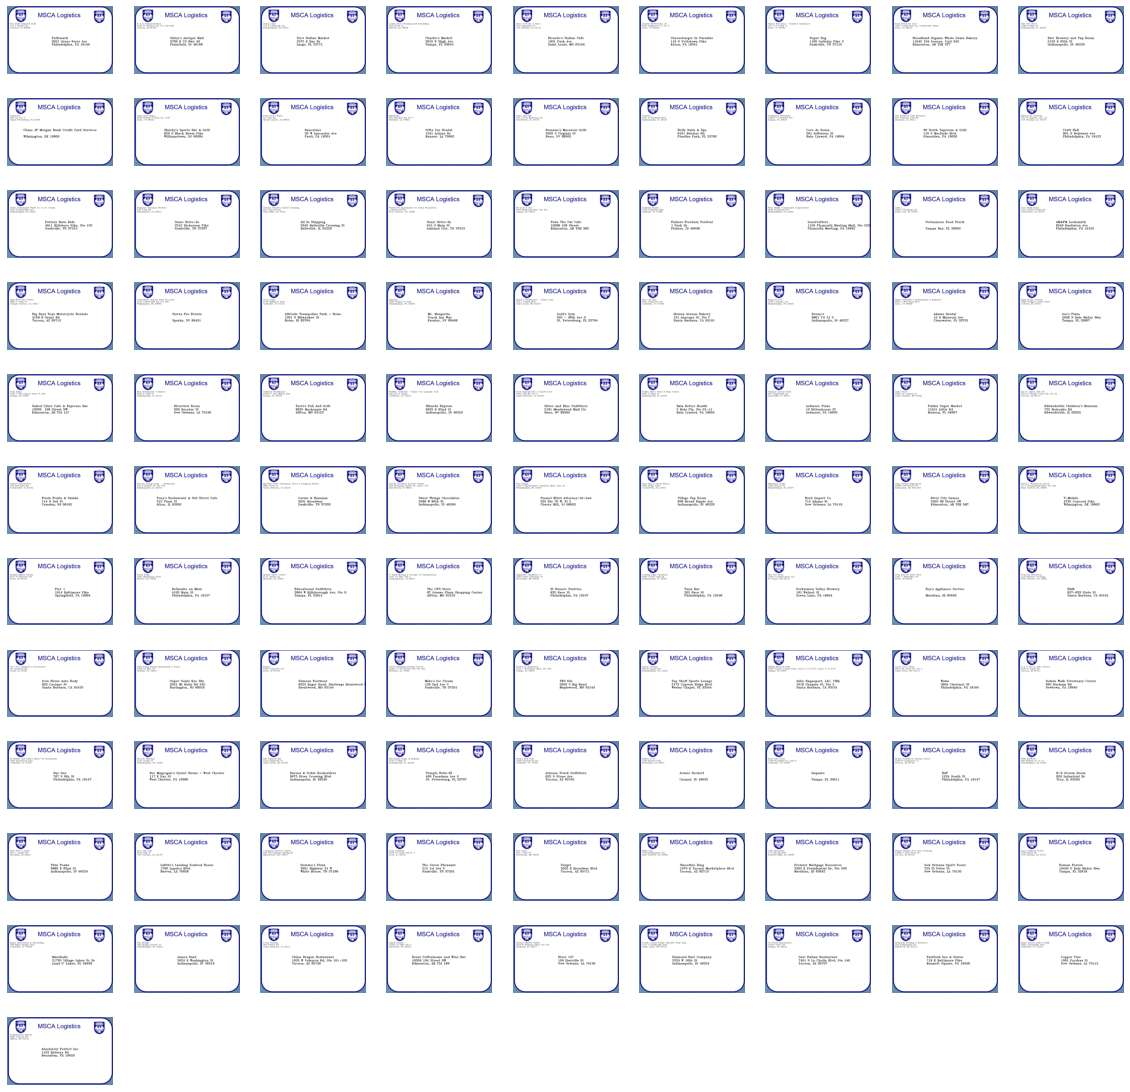

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('Stickers/*.png'):
    images.append(cv2.imread(img_path))

plt.figure(figsize=(20,20))
columns = 9
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.axis("off")

In [ ]:
image.shape

(539, 838, 3)

In [ ]:
img_path_big_cardboard = 'Bigger_CardBoard_Pieces/Test_Cardboard.jpg'
big_cardboard=cv2.imread(img_path_big_cardboard)
big_cardboard.shape

(3552, 4667, 3)

#### Show example box with shipping Label

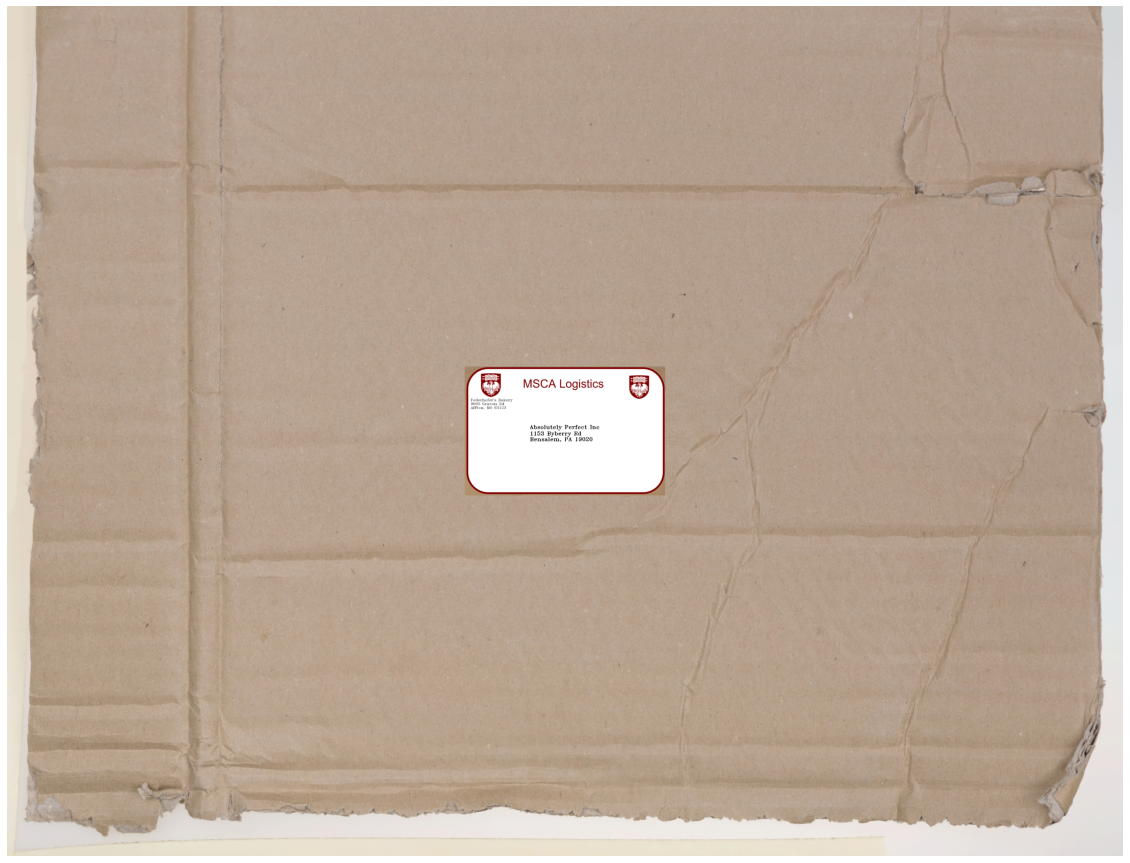

In [ ]:
height, width = (big_cardboard.shape[0] , big_cardboard.shape[1])


x_offset = int((width - image.shape[1])/2)
y_offset = int((height - image.shape[0])/2)

big_cardboard[ y_offset:y_offset+image.shape[0], x_offset:x_offset+image.shape[1]] = image


plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(big_cardboard, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
for i, image in enumerate(images):
    
    #for each iteration, need to reload the Big Cardboard piece
    
    img_path_big_cardboard = 'Bigger_CardBoard_Pieces/Test_Cardboard.jpg'
    big_cardboard=cv2.imread(img_path_big_cardboard)
    
    height, width = (big_cardboard.shape[0] , big_cardboard.shape[1])
    x_offset = int((width - image.shape[1])/2)
    y_offset = int((height - image.shape[0])/2)

    big_cardboard[ y_offset:y_offset+image.shape[0], x_offset:x_offset+image.shape[1]] = image
    
    #Save the Big Cardboard
    cv2.imwrite('Big_CardBoard_id'+df_yelp_2['Shipping_Label_id'][i]+'.png', big_cardboard)

# OCR on Shipping Stickers
    - Standalone Tesseract
    - East/YOLO/textbox++ then Tesseract
    - Layout LM v2
    - TrOCR /TAPAS / TRIE
    - TableFormer

# Tesseract - Create Dataframe of OCR produced Addresses

In [ ]:
import pytesseract
#https://stackoverflow.com/questions/50951955/pytesseract-tesseractnotfound-error-tesseract-is-not-installed-or-its-not-i

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [ ]:
custom_config = r'--oem 3 --psm 3'
OCR_Addresses=[]
image_name =[]



for img_path in glob.glob('Stickers/*.png'):
    image = cv2.imread(img_path)
    txxt=pytesseract.image_to_string(image, config=custom_config)
    
    OCR_Addresses.append(txxt)
    image_name.append(img_path)

In [ ]:
ocr_add_df=pd.DataFrame(OCR_Addresses, columns = ['OCR_Addresses'])
ocr_add_df['New_Line_Count']=ocr_add_df['OCR_Addresses'].str.count('\n')

sticker_id_df=pd.DataFrame(image_name, columns = ['sticker_id'])

In [ ]:
result_df = pd.concat([sticker_id_df, ocr_add_df], axis=1, join="inner")

In [ ]:
result_df.head(5)

,sticker_id,OCR_Addresses,New_Line_Count
0,Stickers\smaller_Sticker_id_-4dYsYy-FZ.png,MSCA Logistics\n\nThe Bowl inspired Grill\n113...,11
1,Stickers\smaller_Sticker_id_-ZXYcktZZN.png,MSCA Logistics\n\nB & B Transportation\n1645 W...,10
2,Stickers\smaller_Sticker_id_0bPLkAfhWO.png,MSCA Logistics\n\nSharp Clips\n711 E Passyunk ...,10
3,Stickers\smaller_Sticker_id_0qNpTa2Dml.png,MSCA Logistics\n\nCajun Duct Cleaning and Sani...,11
4,Stickers\smaller_Sticker_id_1MeIwTUTQe.png,MSCA Logistics\n\nTito's Ceviche & Pisco\n5015...,10


#### Light Text Cleaning
    - if theres less than 10 lines - big issue because may not know which of 6 lines is blank (from address line 1, etc)
    - Regex needed - if there's double \n's - only use the first \n

In [ ]:
def light_text_cleaning(df_3):
    #replace multiple lines with a single line
    df_3['clean_OCR_Addresses']=df_3['OCR_Addresses'].str.replace(r'\n+','\n')
    df_3['sticker_id_2']=df_3['sticker_id'].str.replace(r'Stickers\\smaller_Sticker_id_','')
    df_3['sticker_id_3']=df_3['sticker_id_2'].str.replace(r'.png','')
    return df_3

In [ ]:
import time
t_start = time.time()

result_df=light_text_cleaning(result_df)
result_df['Clean_New_Line_Count']=result_df['clean_OCR_Addresses'].str.count('\n')

t_stop = time.time()
print('Time elapsed: {:.3f} seconds'.format(t_stop - t_start))

Time elapsed: 0.003 seconds


#### Around 90% of OCR output have 7 lines

In [ ]:
result_df['Clean_New_Line_Count'].value_counts()

7    90
6    10
Name: Clean_New_Line_Count, dtype: int64

#### Troubleshoot Addresses that have only 6 Lines

In [ ]:
add_6=result_df[result_df['Clean_New_Line_Count']==6].reset_index(drop=True)
add_6.head(5)

,sticker_id,OCR_Addresses,New_Line_Count,clean_OCR_Addresses,sticker_id_2,sticker_id_3,Clean_New_Line_Count
0,Stickers\smaller_Sticker_id_7PDi_DJXks.png,"MSCA Logistics\n\nSuntrust,\n300 Ist Ave S\nSa...",10,"MSCA Logistics\nSuntrust,\n300 Ist Ave S\nSain...",7PDi_DJXks.png,7PDi_DJXks,6
1,Stickers\smaller_Sticker_id_9OG5YY7155.png,MSCA Logistics\n\n625 8 Fort Harrison Ave\nCle...,9,MSCA Logistics\n625 8 Fort Harrison Ave\nClear...,9OG5YY7155.png,9OG5YY7155,6
2,Stickers\smaller_Sticker_id_eEOYSUsNHY.png,MSCA Logistics\n\nArby's\n1909 S Frontage Rd\n...,10,MSCA Logistics\nArby's\n1909 S Frontage Rd\nPl...,eEOYSUsNHY.png,eEOYSUsNHY,6
3,Stickers\smaller_Sticker_id_fSCNwB-ljb.png,MSCA Logistics\n\nTenorshare iPhone Data Recov...,10,MSCA Logistics\nTenorshare iPhone Data Recover...,fSCNwB-ljb.png,fSCNwB-ljb,6
4,Stickers\smaller_Sticker_id_n7AQvpcaZY.png,MSCA Logistics\n\nTrek Bicycle Boise West\n140...,10,MSCA Logistics\nTrek Bicycle Boise West\n1401 ...,n7AQvpcaZY.png,n7AQvpcaZY,6


In [ ]:
print(add_6['OCR_Addresses'][0])

MSCA Logistics

Suntrust,
300 Ist Ave S
Saint Petersburg, FL 33701

Chase JP Morgan Bank Credit Card Services

Wilmington, DE 19850




In [ ]:
print(add_6['clean_OCR_Addresses'][0])

MSCA Logistics
Suntrust,
300 Ist Ave S
Saint Petersburg, FL 33701
Chase JP Morgan Bank Credit Card Services
Wilmington, DE 19850



## Create OCR Final Results Data Frame

In [ ]:
result_df.pop('OCR_Addresses')
result_df.pop('New_Line_Count')

result_df.pop('sticker_id')
result_df.pop('sticker_id_2')
result_df['sticker_id']=result_df['sticker_id_3']
result_df.pop('sticker_id_3')
result_df.head(5)

,clean_OCR_Addresses,Clean_New_Line_Count,sticker_id
0,MSCA Logistics\nThe Bowl inspired Grill\n113 S...,7,-4dYsYy-FZ
1,MSCA Logistics\nB & B Transportation\n1645 W V...,7,-ZXYcktZZN
2,MSCA Logistics\nSharp Clips\n711 E Passyunk av...,7,0bPLkAfhWO
3,MSCA Logistics\nCajun Duct Cleaning and Saniti...,7,0qNpTa2Dml
4,MSCA Logistics\nTito's Ceviche & Pisco\n5015 M...,7,1MeIwTUTQe


### Split the captured Address text into separate lines

In [ ]:
OCR_From_Line_1 = []
OCR_From_Line_2 = []
OCR_From_Line_3 = []

OCR_To_Line_1 = []
OCR_To_Line_2 = []
OCR_To_Line_3 = []

for i, sentence in enumerate(result_df['clean_OCR_Addresses']):
    adr_lines = sentence.split("\n")
    #below works for when theres 7 address lines
    OCR_From_Line_1.append(adr_lines[1])
    OCR_From_Line_2.append(adr_lines[2])
    OCR_From_Line_3.append(adr_lines[3])

    OCR_To_Line_1.append(adr_lines[4])
    OCR_To_Line_2.append(adr_lines[5])
    OCR_To_Line_3.append(adr_lines[6])

In [ ]:
ocr_results_df = pd.DataFrame(
    {'OCR_From_Line_1': OCR_From_Line_1,
     'OCR_From_Line_2': OCR_From_Line_2,
     'OCR_From_Line_3': OCR_From_Line_3,
     
     'OCR_To_Line_1': OCR_To_Line_1,
     'OCR_To_Line_2': OCR_To_Line_2,
     'OCR_To_Line_3': OCR_To_Line_3,
    })

final_result_df = pd.concat([result_df, ocr_results_df], axis=1, join="inner")
final_result_df.head(5)

,clean_OCR_Addresses,Clean_New_Line_Count,sticker_id,OCR_From_Line_1,OCR_From_Line_2,OCR_From_Line_3,OCR_To_Line_1,OCR_To_Line_2,OCR_To_Line_3
0,MSCA Logistics\nThe Bowl inspired Grill\n113 S...,7,-4dYsYy-FZ,The Bowl inspired Grill,113 S Warren St,"Trenton, NJ 08608",Pathmark,3021 Grays Ferry Ave,"Philadelphia, PA 19146"
1,MSCA Logistics\nB & B Transportation\n1645 W V...,7,-ZXYcktZZN,B & B Transportation,"1645 W Valencia Rd, Ste 109-402","Tucson, AZ 85746",Gilley’s Antique Mall,5789 E US Hwy 40,"Plainfield, IN 46168"
2,MSCA Logistics\nSharp Clips\n711 E Passyunk av...,7,0bPLkAfhWO,Sharp Clips,711 E Passyunk ave,"Philadelphia, PA 19147",Zio's Italian Market,2575 E Bay Dr,"Largo, FL 33771"
3,MSCA Logistics\nCajun Duct Cleaning and Saniti...,7,0qNpTa2Dml,Cajun Duct Cleaning and Sanitizing,654 Leson Ct,"Harvey, LA 70038",Charlie's Market,2815 E Sligh Ave,"Tampa, FL 33610"
4,MSCA Logistics\nTito's Ceviche & Pisco\n5015 M...,7,1MeIwTUTQe,Tito's Ceviche & Pisco,5015 Magazine St,"New Orleans, LA 70115",Ricardo's Italian Cafe,1931 Park Ave,"Saint Louis, MO 63104"


## Accuracy Check - Compare OCR Addresses with Original Addresses

In [ ]:
df_yelp_3=df_yelp_2[['Shipping_Label_id','To_Line_1', 
           'To_Line_2','To_Line_3', 'From_Line_1', 
           'From_Line_2', 'From_Line_3']]
df_yelp_3.columns=['sticker_id', 'To_Line_1', 'To_Line_2', 'To_Line_3',
       'From_Line_1', 'From_Line_2', 'From_Line_3']
df_yelp_3.head(3)

,sticker_id,To_Line_1,To_Line_2,To_Line_3,From_Line_1,From_Line_2,From_Line_3
0,Pns2lccPRP,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2","Santa Barbara, CA 93101",QDOBA Mexican Eats,"4100 George J Bean Pkwy, Space T-3-1737, Space...","Tampa, FL 33607"
1,mpf3xNYxuY,The UPS Store,87 Grasso Plaza Shopping Center,"Affton, MO 63123",U-Haul Moving & Storage of Cinnaminson,2101 US Hwy 130 S,"Cinnaminson, NJ 08077"
2,tUFrW0exAf,Target,5255 E Broadway Blvd,"Tucson, AZ 85711",Five Guys,250 N Hwy 67,"Florissant, MO 63031"


In [ ]:
comparison_df=pd.merge(final_result_df, 
         df_yelp_3, 
         how="inner", on=['sticker_id'])

In [ ]:
#https://towardsdatascience.com/3-basic-distance-measurement-in-text-mining-5852becff1d7
#https://stackoverflow.com/questions/63531985/calculate-ocr-accuracy

#pip install python-Levenshtein
from Levenshtein import distance

#https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe
comparison_df.head(3)

,clean_OCR_Addresses,Clean_New_Line_Count,sticker_id,OCR_From_Line_1,OCR_From_Line_2,OCR_From_Line_3,OCR_To_Line_1,OCR_To_Line_2,OCR_To_Line_3,To_Line_1,To_Line_2,To_Line_3,From_Line_1,From_Line_2,From_Line_3
0,MSCA Logistics\nThe Bowl inspired Grill\n113 S...,7,-4dYsYy-FZ,The Bowl inspired Grill,113 S Warren St,"Trenton, NJ 08608",Pathmark,3021 Grays Ferry Ave,"Philadelphia, PA 19146",Pathmark,3021 Grays Ferry Ave,"Philadelphia, PA 19146",The Bowl inspired Grill,113 S Warren St,"Trenton, NJ 08608"
1,MSCA Logistics\nB & B Transportation\n1645 W V...,7,-ZXYcktZZN,B & B Transportation,"1645 W Valencia Rd, Ste 109-402","Tucson, AZ 85746",Gilley’s Antique Mall,5789 E US Hwy 40,"Plainfield, IN 46168",Gilley's Antique Mall,5789 E US Hwy 40,"Plainfield, IN 46168",B & B Transportation,"1645 W Valencia Rd, Ste 109-402","Tucson, AZ 85746"
2,MSCA Logistics\nSharp Clips\n711 E Passyunk av...,7,0bPLkAfhWO,Sharp Clips,711 E Passyunk ave,"Philadelphia, PA 19147",Zio's Italian Market,2575 E Bay Dr,"Largo, FL 33771",Zio's Italian Market,2575 E Bay Dr,"Largo, FL 33771",Sharp Clips,711 E Passyunk Ave,"Philadelphia, PA 19147"


In [ ]:
comparison_df['Lv_From_Line_1'] = comparison_df.apply(lambda x: distance(x.OCR_From_Line_1, x.From_Line_1), axis=1)
comparison_df['Lv_From_Line_2'] = comparison_df.apply(lambda x: distance(x.OCR_From_Line_2, x.From_Line_2), axis=1)
comparison_df['Lv_From_Line_3'] = comparison_df.apply(lambda x: distance(x.OCR_From_Line_3, x.From_Line_3), axis=1)

comparison_df['Lv_To_Line_1'] = comparison_df.apply(lambda x: distance(x.OCR_To_Line_1, x.To_Line_1), axis=1)
comparison_df['Lv_To_Line_2'] = comparison_df.apply(lambda x: distance(x.OCR_To_Line_2, x.To_Line_2), axis=1)
comparison_df['Lv_To_Line_3'] = comparison_df.apply(lambda x: distance(x.OCR_To_Line_3, x.To_Line_3), axis=1)

In [ ]:
comparison_df['Len_From_Line_1'] = comparison_df.apply(lambda x: len(x.From_Line_1), axis=1)
comparison_df['Len_From_Line_2'] = comparison_df.apply(lambda x: len(x.From_Line_2), axis=1)
comparison_df['Len_From_Line_3'] = comparison_df.apply(lambda x: len(x.From_Line_3), axis=1)

comparison_df['Len_To_Line_1'] = comparison_df.apply(lambda x: len(x.To_Line_1), axis=1)
comparison_df['Len_To_Line_2'] = comparison_df.apply(lambda x: len(x.To_Line_2), axis=1)
comparison_df['Len_To_Line_3'] = comparison_df.apply(lambda x: len(x.To_Line_3), axis=1)

In [ ]:
comparison_df['Tot_Lev_Dist']=comparison_df['Lv_From_Line_1']+comparison_df['Lv_From_Line_2']+comparison_df['Lv_From_Line_3']+comparison_df['Lv_To_Line_1']+comparison_df['Lv_To_Line_2']+comparison_df['Lv_To_Line_3']
comparison_df['Tot_Length']=comparison_df['Len_From_Line_1']+comparison_df['Len_From_Line_2']+comparison_df['Len_From_Line_3']+comparison_df['Len_To_Line_1']+comparison_df['Len_To_Line_2']+comparison_df['Len_To_Line_3']

In [ ]:
comparison_df['Accuracy']=1-(comparison_df['Tot_Lev_Dist']/comparison_df['Tot_Length'])

### Check each box's accuracy

<AxesSubplot:xlabel='Accuracy', ylabel='Count'>

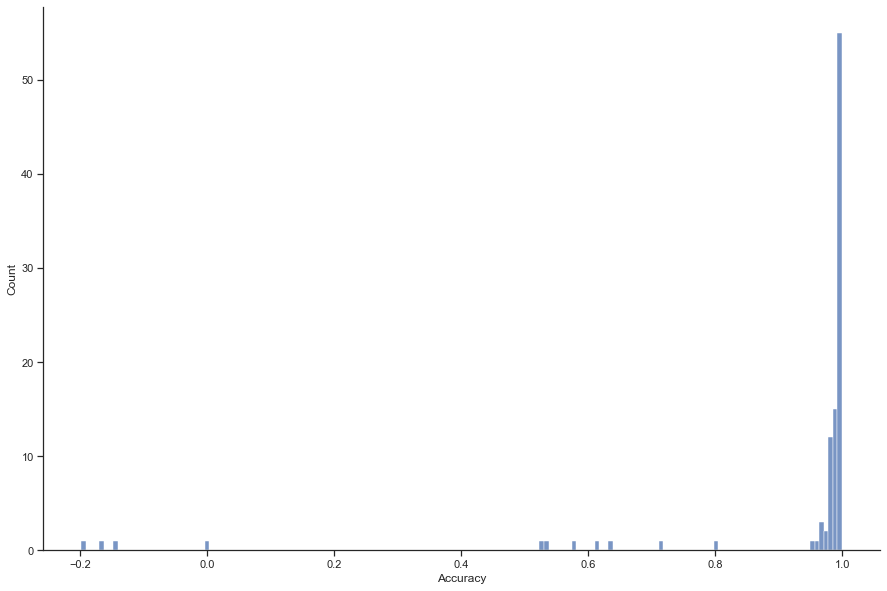

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(15,10))
sns.despine(f)

sns.histplot(comparison_df, x='Accuracy')

### Avg Accuracy accross all boxes

In [ ]:
comparison_df['Accuracy'].mean()

0.92290185267466